In [1]:
import numpy as np
from scipy.stats import multivariate_normal as mn
import matplotlib.pyplot as plt

In [2]:
X=np.loadtxt('X.txt')

In [3]:
n,d=X.shape
k=5 # number of components
random_seed=777

In [4]:
### Initialize theta randomly
np.random.seed(random_seed)
pi=np.random.rand(k)
pi/=sum(pi) #normalization
mu=np.random.randn(k,d)
sigma=[]
for _ in range(k):
    A=np.random.randn(d,d)
    sigma.append(A@A.T)

In [5]:
def E_step(pi,mu,sigma):
    # Responsibility values
    r=np.array([[pi[j]*mn.pdf(X[i],mu[j],sigma[j]) for j in range(k)] for i in range(n)])
    for i in range(n):
        s=sum(r[i])
        for j in range(k):
            r[i][j]/=s
    # Complete-data log-likelihood
    L=sum(sum(r[i][j]*(np.log(pi[j])+mn.logpdf(X[i],mu[j],sigma[j])) for j in range(k)) for i in range(n))
    return r,L

def M_step(r):
    pi=np.array([np.mean(r[:,j]) for j in range(k)])
    mu=np.array([sum(r[i][j]*X[i] for i in range(n))/(n*pi[j]) for j in range(k)])
    sigma=np.array([sum(r[i][j]*np.outer(X[i]-mu[j],X[i]-mu[j]) for i in range(n))/(n*pi[j]) for j in range(k)])
    return pi,mu,sigma

In [6]:
t=1
Ls=[]
L_prev=0
eps=1e-3
while True:
    r,L=E_step(pi,mu,sigma)
    Ls.append(L)
    if t>1 and abs(L_prev-L)<eps:
        break
    L_prev=L
    pi,mu,sigma=M_step(r)
    # Logging
    if t%5==1:
        print(L)
    t+=1

-13643.352022656489
-5337.891823192428
-4708.021625973056
-4436.282275134983


In [7]:
print(Ls[0],Ls[-1])

-13643.352022656489 -4436.270817079326


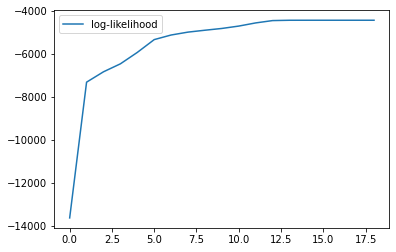

In [8]:
plt.plot(Ls, label='log-likelihood')
plt.legend()